Importamos librerias.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
pd.options.display.max_rows = 30
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

Cargamos el dataset.

In [3]:
df = pd.read_csv('adult.csv')
print(df.shape)
print(df.isna().sum())

(32561, 15)
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


Hacemos revision de datos faltantes

In [4]:
df = df.applymap(lambda x : np.nan if x == "?" else x).dropna() #Decidimos deshacernos de ellos ya que solo se componen por aproximadamente 2000 registros.
df.shape

(30162, 15)

Revisamos columnas

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
#print(df.age.unique()) #No es necesario convertir

#print(df.workclass.unique()) 
#'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc','Local-gov' 'Without-pay'

#df.education.unique() 
#'HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate','Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc','1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'

#df.sort_values("education.num") 
#De 1 - preschool a 16 - Doctorate

#df["marital.status"].unique() #7 val
#'Widowed', 'Divorced', 'Separated', 'Never-married','Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'

#df.occupation.unique() # 14 val
#'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty','Other-service', 'Adm-clerical', 'Transport-moving', 'Sales','Craft-repair', 'Farming-fishing', 'Tech-support','Protective-serv', 'Handlers-cleaners', 'Armed-Forces','Priv-house-serv'

#df.relationship.unique()
#'Not-in-family', 'Unmarried', 'Own-child', 'Other-relative','Husband', 'Wife'

#print(df.race.unique()) # 5 val
#'White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'

#df.sex.unique() # 2 val

#print(df['capital.loss']) #No es necesario convertir

#df.fnlwgt.unique().shape

#sns.distplot(df.fnlwgt)


#df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})


Hacemos cambios en los datos.

In [6]:
df['workclass_num'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})

df["marital_status_num"] = df["marital.status"].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3,'Married-civ-spouse':4, 'Married-spouse-absent':5, 'Married-AF-spouse':6})

df["occupation_num"] = df["occupation"].map({'Exec-managerial':0, 'Machine-op-inspct':1, 'Prof-specialty':2,'Other-service':3, 'Adm-clerical':4, 'Transport-moving':5, 'Sales':6,'Craft-repair':7, 'Farming-fishing':8, 'Tech-support':9,'Protective-serv':10, 'Handlers-cleaners':11, 'Armed-Forces':12,'Priv-house-serv':13})

df["relationship_num"] = df.relationship.map({'Not-in-family':0, 'Unmarried':1, 'Own-child':2, 'Other-relative':3,'Husband':4, 'Wife':5})

df["race_num"] = df.race.map{'White':0 ,'Black':1, 'Asian-Pac-Islander':2 ,'Other':3, 'Amer-Indian-Eskimo':4}

df["sex_num"] = np.where(df.sex == "Male", 0,1) #dos valores

df["capital_chage"] = df["capital.loss"].applymap(lambda x : -x) + df

df["income_num"] = np.where(df.income == '<=50K', 0, 1) #dos valores, a una variable dummy 

numerable = ["age","workclass_num","fnlwgt","education.num","marital_status_num","occupation_num","relationship_num","sex_num","capital.loss","capital.gain",'hours.per.week','native_country_num',"income_num"]

In [ ]:
df["native.countries"]

In [22]:
a = df["capital.loss"]
b = df["capital.gain"]
a = a.apply(lambda x : -x)
(a + b).sort_values()
#a.append(b).isna().sum()#.sort_values()

1       -4356
3       -3900
4       -3900
5       -3770
6       -3770
7       -3683
8       -3683
10      -3004
11      -2824
12      -2824
13      -2824
15      -2824
16      -2824
17      -2824
19      -2824
        ...  
1636    99999
1635    99999
1633    99999
1632    99999
1631    99999
1630    99999
1629    99999
1628    99999
1627    99999
1626    99999
1624    99999
1623    99999
1622    99999
1620    99999
1634    99999
Length: 30162, dtype: int64

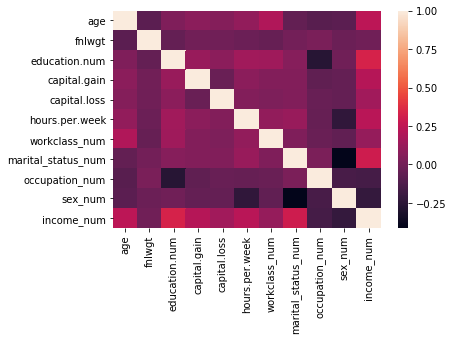

In [9]:
sns.heatmap(df.corr());
#df.corr()["feature"].apply(abs).sort_values(ascending=False)